<a href="https://colab.research.google.com/github/somya2005-ready/ECE-Simulations-and-Projects./blob/main/ML_LAB_13Feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Measurement of electric power consumption (data loadipng ,subsetting , histogram ,time series ,plots)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load dataset
file_path = "household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', parse_dates={'datetime': ['Date', 'Time']},
                 infer_datetime_format=True, na_values='?', low_memory=False)

# Convert to datetime index
df.set_index('datetime', inplace=True)

# Convert numeric columns
df = df.apply(pd.to_numeric, errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Display basic info
print(df.info())
print(df.head())


<ipython-input-3-a822276887a1>:10: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_path, sep=';', parse_dates={'datetime': ['Date', 'Time']},
<ipython-input-3-a822276887a1>:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file_path, sep=';', parse_dates={'datetime': ['Date', 'Time']},


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274955 entries, 2006-12-16 17:24:00 to 2007-06-28 06:52:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    274955 non-null  float64
 1   Global_reactive_power  274955 non-null  float64
 2   Voltage                274955 non-null  float64
 3   Global_intensity       274955 non-null  float64
 4   Sub_metering_1         274955 non-null  float64
 5   Sub_metering_2         274955 non-null  float64
 6   Sub_metering_3         274955 non-null  float64
dtypes: float64(7)
memory usage: 16.8 MB
None
                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00          

<ipython-input-3-a822276887a1>:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(file_path, sep=';', parse_dates={'datetime': ['Date', 'Time']},


In [4]:
# Filter for specific dates
df_subset = df.loc['2007-02-01':'2007-02-02']
print(df_subset.head())


                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2007-02-01 00:00:00                0.326                  0.128   243.15   
2007-02-01 00:01:00                0.326                  0.130   243.32   
2007-02-01 00:02:00                0.324                  0.132   243.51   
2007-02-01 00:03:00                0.324                  0.134   243.90   
2007-02-01 00:04:00                0.322                  0.130   243.16   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2007-02-01 00:00:00               1.4             0.0             0.0   
2007-02-01 00:01:00               1.4             0.0             0.0   
2007-02-01 00:02:00               1.4             0.0             0.0   
2007-02-01 00:03:00               1.4             0.0             0.0   
2007-02-01 00:04:00          

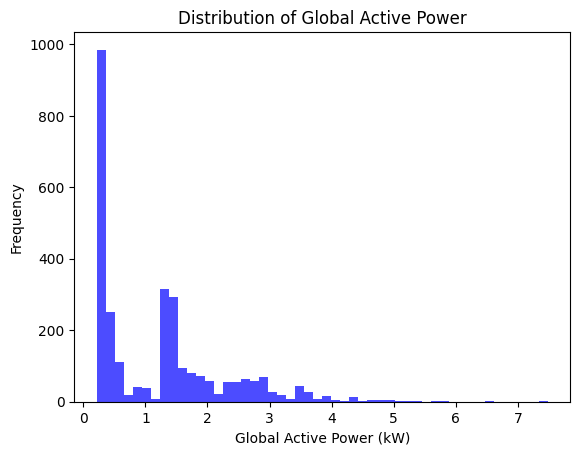

In [5]:
plt.hist(df_subset["Global_active_power"], bins=50, color="blue", alpha=0.7)
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Frequency")
plt.title("Distribution of Global Active Power")
plt.show()


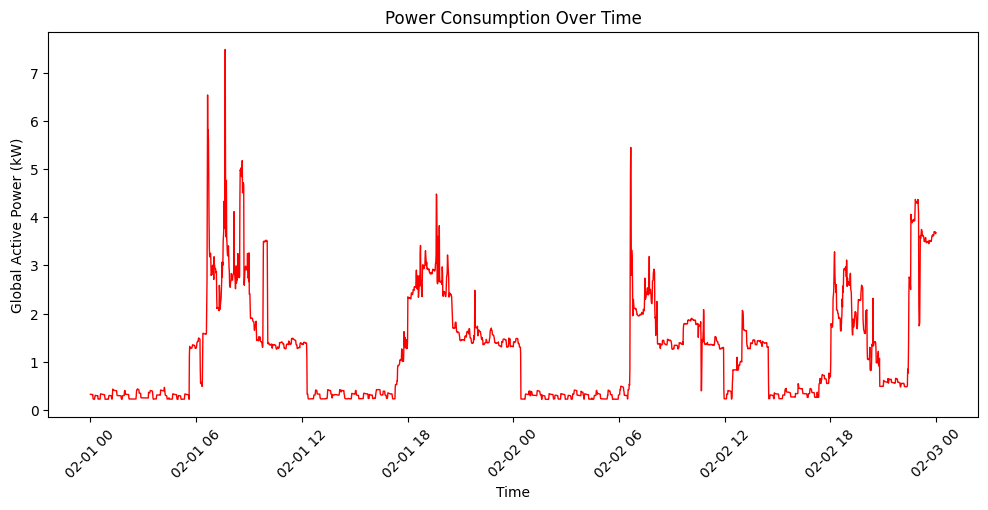

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(df_subset.index, df_subset["Global_active_power"], color="red", linewidth=1)
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.title("Power Consumption Over Time")
plt.xticks(rotation=45)
plt.show()


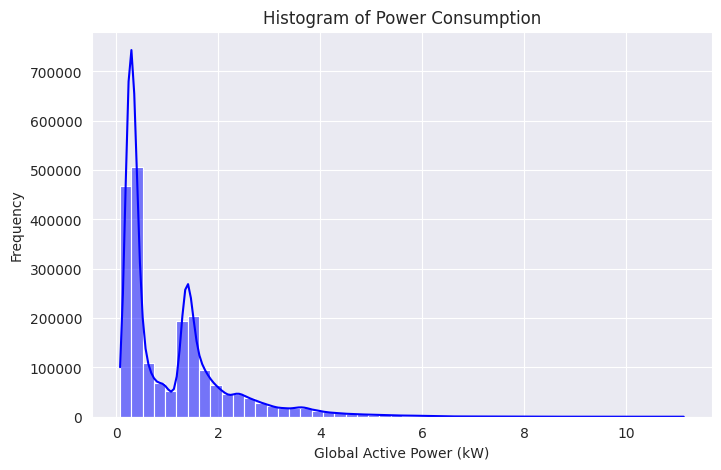

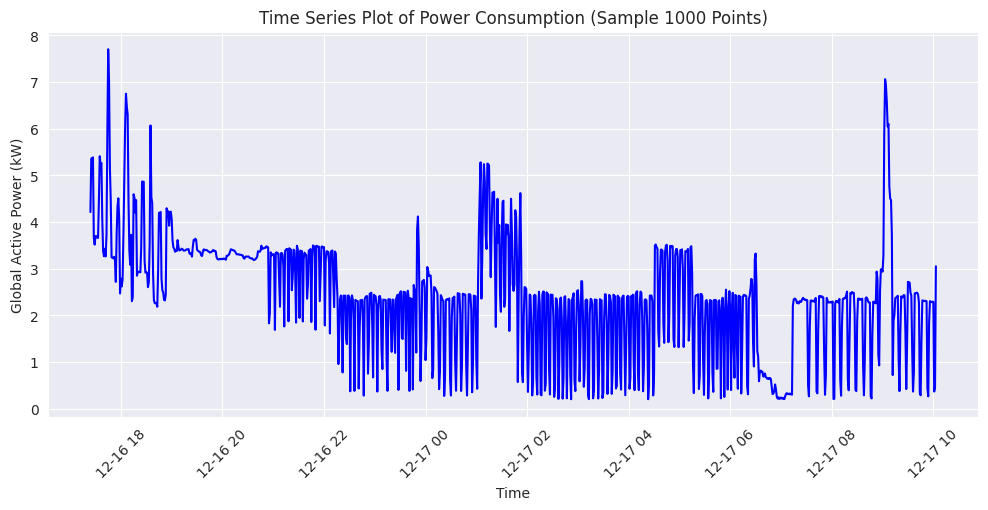

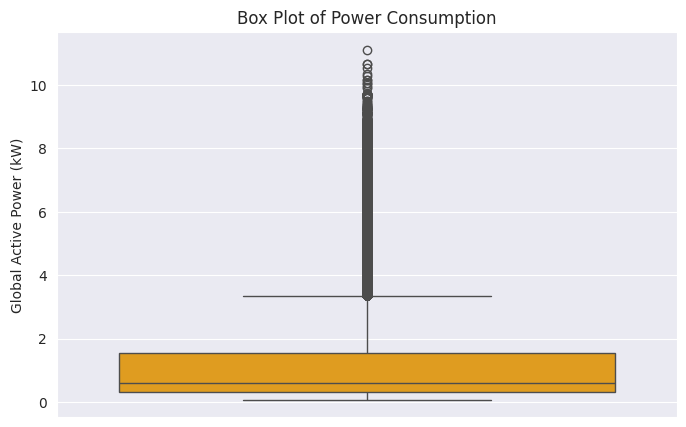

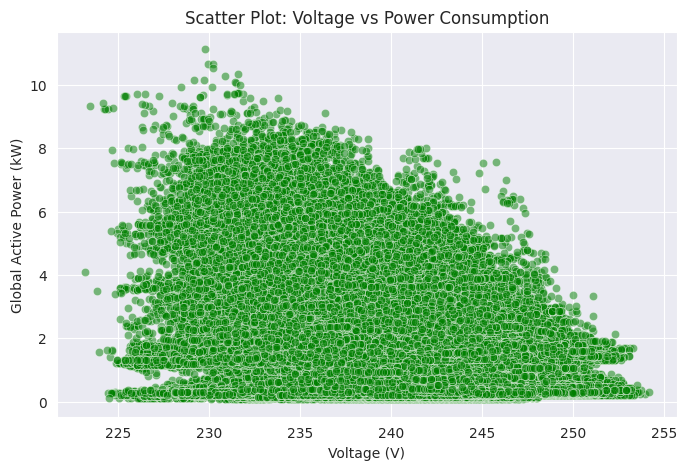

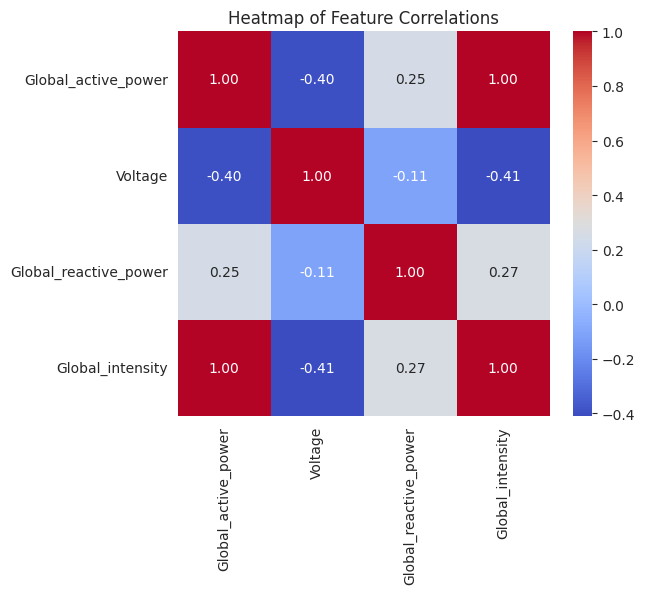

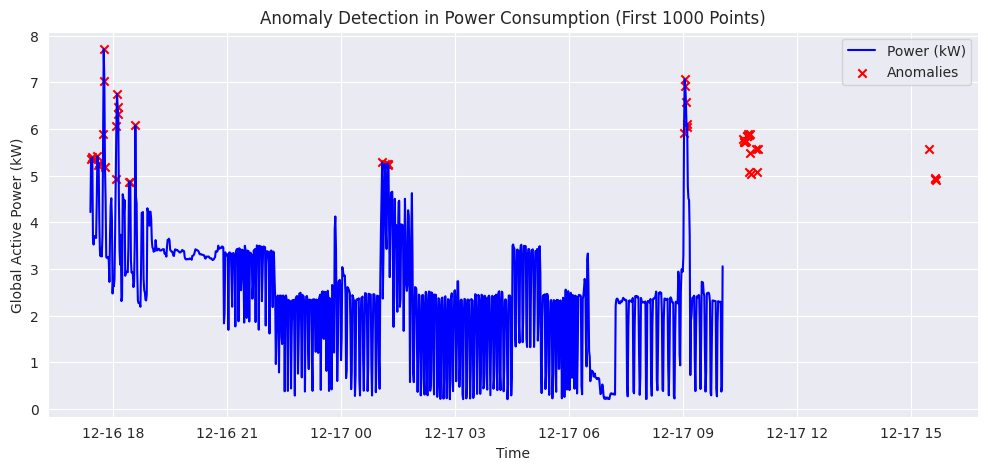

KeyboardInterrupt: 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
file_path = "household_power_consumption.txt"  # Update with actual path
df = pd.read_csv(file_path, sep=';', parse_dates={'datetime': ['Date', 'Time']},
                 infer_datetime_format=True, na_values='?', low_memory=False)
df.set_index('datetime', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Select relevant columns
df_subset = df[['Global_active_power', 'Voltage', 'Global_reactive_power', 'Global_intensity']]

# Set figure style
sns.set_style("darkgrid")

# ------ 1. HISTOGRAM (Power Consumption Distribution) ------
plt.figure(figsize=(8, 5))
sns.histplot(df_subset["Global_active_power"], bins=50, kde=True, color="blue")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Frequency")
plt.title("Histogram of Power Consumption")
plt.show()

# ------ 2. TIME SERIES PLOT ------
plt.figure(figsize=(12, 5))
plt.plot(df_subset.index[:1000], df_subset["Global_active_power"][:1000], color="blue")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.title("Time Series Plot of Power Consumption (Sample 1000 Points)")
plt.xticks(rotation=45)
plt.show()

# ------ 3. BOX PLOT (Detecting Outliers) ------
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_subset["Global_active_power"], color="orange")
plt.ylabel("Global Active Power (kW)")
plt.title("Box Plot of Power Consumption")
plt.show()

# ------ 4. SCATTER PLOT (Power vs Voltage) ------
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_subset["Voltage"], y=df_subset["Global_active_power"], alpha=0.5, color="green")
plt.xlabel("Voltage (V)")
plt.ylabel("Global Active Power (kW)")
plt.title("Scatter Plot: Voltage vs Power Consumption")
plt.show()

# ------ 5. HEATMAP (Correlation Matrix) ------
plt.figure(figsize=(6, 5))
sns.heatmap(df_subset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

# ------ 6. ANOMALY DETECTION PLOT (Isolation Forest) ------
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_subset["anomaly"] = iso_forest.fit_predict(df_subset[["Global_active_power"]])
anomalies = df_subset[df_subset["anomaly"] == -1]

plt.figure(figsize=(12, 5))
plt.plot(df_subset.index[:1000], df_subset["Global_active_power"][:1000], color="blue", label="Power (kW)")
plt.scatter(anomalies.index[:50], anomalies["Global_active_power"][:50], color="red", label="Anomalies", marker='x')
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.title("Anomaly Detection in Power Consumption (First 1000 Points)")
plt.legend()
plt.show()

# ------ 7. TIME SERIES FORECASTING (ARIMA) ------
model = ARIMA(df_subset["Global_active_power"], order=(5,1,0))
arima_model = model.fit()
forecast_steps = 24
forecast = arima_model.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 5))
plt.plot(df_subset.index[-500:], df_subset["Global_active_power"].iloc[-500:], label="Actual Data", color="blue")
plt.plot(pd.date_range(start=df_subset.index[-1], periods=forecast_steps, freq="H"),
         forecast, label="Forecast", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.title("ARIMA Forecast for Power Consumption (Next 24 Hours)")
plt.legend()
plt.show()


Predicting Global Active Power based on time-based features using Linear Regression.

In [7]:
# Feature Engineering
df_subset["hour"] = df_subset.index.hour
df_subset["day"] = df_subset.index.day
df_subset["month"] = df_subset.index.month

# Define features and target
X = df_subset[["hour", "day", "month"]]
y = df_subset["Global_active_power"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Mean Absolute Error: 0.8223


<ipython-input-7-d4c01ce03327>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["hour"] = df_subset.index.hour
<ipython-input-7-d4c01ce03327>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["day"] = df_subset.index.day
<ipython-input-7-d4c01ce03327>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [8]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.5 MB/s eta 0:00:00


ARIMA forecasting

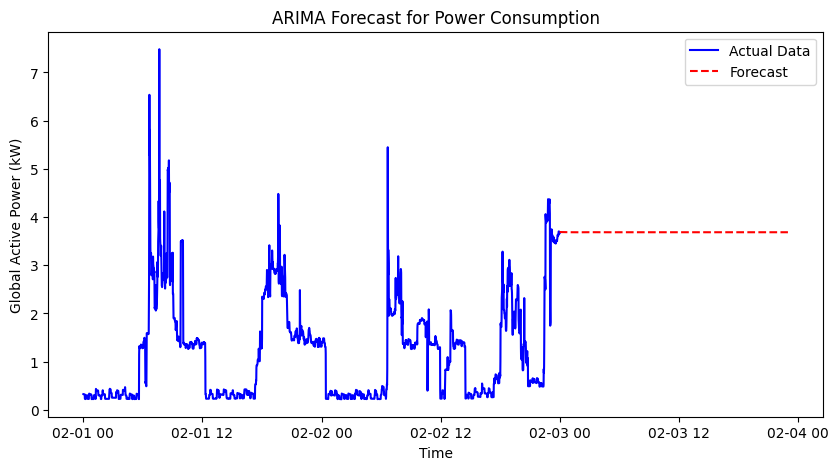

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Use only 'Global_active_power' for time-series forecasting
ts_data = df_subset["Global_active_power"]

# Fit ARIMA model (AutoRegressive Integrated Moving Average)
model = ARIMA(ts_data, order=(5,1,0))  # (p=5, d=1, q=0)
arima_model = model.fit()

# Forecast for the next 24 hours
forecast_steps = 24
forecast = arima_model.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(ts_data.index, ts_data, label="Actual Data", color="blue")
plt.plot(pd.date_range(start=ts_data.index[-1], periods=forecast_steps, freq="H"),
         forecast, label="Forecast", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.title("ARIMA Forecast for Power Consumption")
plt.legend()
plt.show()


Anomaly Detection in Power Consumption

In [10]:
pip install scikit-learn


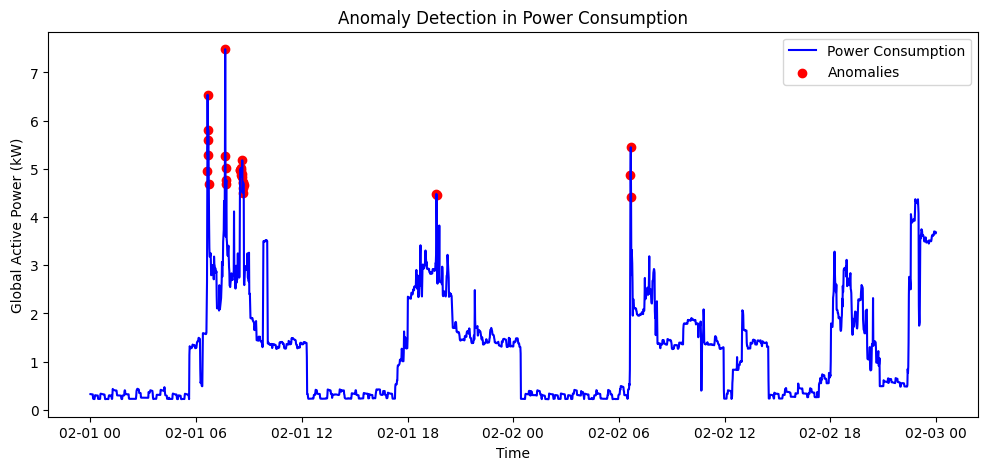

In [11]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # 1% anomalies
df_subset["anomaly"] = iso_forest.fit_predict(df_subset[["Global_active_power"]])

# Mark anomalies
anomalies = df_subset[df_subset["anomaly"] == -1]

# Plot anomalies
plt.figure(figsize=(12, 5))
plt.plot(df_subset.index, df_subset["Global_active_power"], color="blue", label="Power Consumption")
plt.scatter(anomalies.index, anomalies["Global_active_power"], color="red", label="Anomalies")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.title("Anomaly Detection in Power Consumption")
plt.legend()
plt.show()


Deep Learning-Based Prediction Using LSTM

In [12]:
pip install tensorflow


Preparing data for LSTM

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data
sequence_length = 24  # Lookback period (24 hours)
X_lstm, y_lstm = [], []

data = df_subset["Global_active_power"].values

for i in range(len(data) - sequence_length):
    X_lstm.append(data[i:i + sequence_length])
    y_lstm.append(data[i + sequence_length])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Reshape for LSTM (samples, time_steps, features)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Train-test split
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]



Build and Train the LSTM Model

In [14]:
# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation="relu"),
    Dense(1)
])

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
model.fit(X_train_lstm, y_train_lstm, batch_size=16, epochs=10, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.3152 - val_loss: 0.1487
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0927 - val_loss: 0.0718
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0897 - val_loss: 0.0548
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0568 - val_loss: 0.0920
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0659 - val_loss: 0.0582
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0470 - val_loss: 0.0384
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0360 - val_loss: 0.0359
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0402 - val_loss: 0.0486
Epoch 9/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0417 - val_loss: 0.0487
Epoch 10/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0391 - val_loss: 0.0437


Make Predictions and Plot Results

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


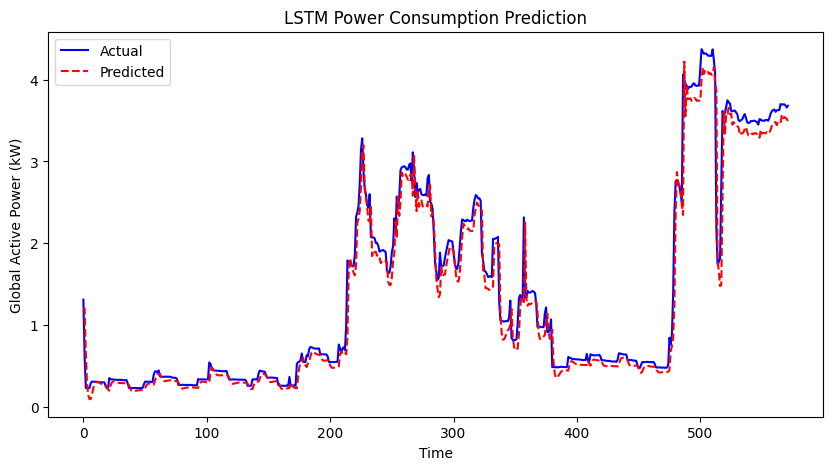

In [15]:
# Predict
predictions = model.predict(X_test_lstm)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test_lstm)), y_test_lstm, color="blue", label="Actual")
plt.plot(range(len(predictions)), predictions, color="red", linestyle="dashed", label="Predicted")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.title("LSTM Power Consumption Prediction")
plt.legend()
plt.show()


SyntaxError: invalid syntax (<ipython-input-17-40b4e5f09014>, line 1)

# New Section

2. Use a dataset (e.g. Iris ot Titanic) to perform basic EDA ;summary statistics , implementing linear regression using gradient descent .

3.Implemet Linear regression using gradient descent manually (without libraries like scikit - learn) .Compute the results with closed form solutions.